Paired TAM (transcient abnormal myleoproliferation) vs AML (acute myeloid leukemia) analysis of patients with the co-occuring condition of Down Syndrome using DESeq2 on IJC counts obtained from rMATS analysis.

Using a matrix constructed from Kids First Workflow V4 done on single runs, a series of scripts were created and are stored in this repository.  For each of the splicing types, all the runs considered for analysis are pooled and normalized to have a non-redundant set of splicing events.  A matrix is then constructed for each of the samples to be analyzed.  

Each splicing type has a bed file for visualizaiton in UCSC Genome browser of all the events, as well as created a matrix of the single runs normalized to the non-redundant union of files.  Both the source and the normalized bed file are available to ensure interprebility of results. 

Using associative arrays in an awk script, it was a rapid way to transform the individual counts from each of the individual runs into a matrix that facilitated analysis.

Using annotations obtained from the rMATS run that provided the coordinates of each of the splicing events as well as the gene that the junctions came from and the count of the reads that overlapped the junctions.   
 
Limma in this notebook is used to perform analysis of these junction counts provided by the rMATS routine.  Using these counts as junction expression.

Between the splicing event differences and the expression differences, between paired samples, biological functional differences may be obtained.

The viper tools are installed from the command line using `conda install` functions


In [1]:
library(mixtools)

mixtools package, version 2.0.0, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




In [2]:
library(bcellViper)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




In [3]:
library(MASS)

In [4]:
library(viper)

In [5]:
library(Glimma)
library(dplyr)
library(edgeR)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [6]:
data(bcellViper, package="bcellViper")

In [7]:
adjfile <- system.file("aracne", "bcellaracne.adj", package = "bcellViper")

In [8]:
attributes(dset)

$.__classVersion__
            R       Biobase          eSet ExpressionSet 
     "2.15.0"      "2.16.0"       "1.3.0"       "1.0.0" 

$experimentData
Experiment data
  Experimenter name:  
  Laboratory:  
  Contact information:  
  Title:  
  URL:  
  PMIDs:  
  No abstract available.

$assayData
<environment: 0x7fa8ae0498c8>

$phenoData
An object of class 'AnnotatedDataFrame'
  sampleNames: GSM44075 GSM44078 ... GSM44302 (211 total)
  varLabels: sampleID description detailed_description
  varMetadata: labelDescription

$featureData
An object of class 'AnnotatedDataFrame': none

$annotation
character(0)

$protocolData
An object of class 'AnnotatedDataFrame': none

$class
[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"


In [9]:
setwd("/Users/annedeslattesmays/Desktop/projects/post-rmats-single-run/paired.TAM.AMLv2/SE_calculate")


In [10]:
getwd()


[1] "/Users/annedeslattesmays/Desktop/projects/post-rmats-single-run/paired.TAM.AMLv2/SE_calculate"

In [11]:
cts <- as.matrix(read.csv("SE.IJC.w.coordinates.matrix.csv",sep=",",row.names="ID"))

In [12]:
cts[1:3,11:dim(cts)[2]]

,PAUVKY.03A,PAUVKY.40A,PAWHSD.03A,PAWHSD.40A,PAWSNZ.03A,PAWSNZ.40A,X_1_PAUTLA.03A,X_1_PAUTLA.40A,X_1_PAVUDU.03A,X_1_PAVUDU.40A
1,9,15,0,0,17,0,44,17,33,19
2,22,19,11,0,9,16,26,11,26,17
3,0,0,0,0,0,0,46,36,38,48


In [13]:
featureData <- data.frame(cts[,1:10])
featureData[1:3,]

,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000117620.15,SLC35A3,chr1,+,100007033,100007156,99993536,99993741,100009287,100009323
2,ENSG00000117620.15,SLC35A3,chr1,+,100007033,100007156,99993536,99993741,100011364,100011533
3,ENSG00000117620.15,SLC35A3,chr1,+,100007033,100007156,99999260,99999415,100009287,100009323


In [14]:
featureData <- featureData[,c(1,2)]

In [15]:
head(featureData,2)

,GeneID,geneSymbol
,<chr>,<chr>
1,ENSG00000117620.15,SLC35A3
2,ENSG00000117620.15,SLC35A3


In [16]:
cts <- data.matrix(cts[,11:20])
mode(cts) <- "integer"
is.integer(cts)

[1] TRUE

In [17]:
dim(cts)
head(cts,2)

[1] 101298     10

,PAUVKY.03A,PAUVKY.40A,PAWHSD.03A,PAWHSD.40A,PAWSNZ.03A,PAWSNZ.40A,X_1_PAUTLA.03A,X_1_PAUTLA.40A,X_1_PAVUDU.03A,X_1_PAVUDU.40A
1,9,15,0,0,17,0,44,17,33,19
2,22,19,11,0,9,16,26,11,26,17


In [18]:
colnames(cts) <- c("PAUVKY.03A","PAUVKY.40A","PAWHSD.03A","PAWHSD.40A","PAWSNZ.03A","PAWSNZ.40A","PAUTLA.03A","PAUTLA.40A","PAVUDU.03A","PAVUDU.40A")

The PAWHSD samples are not TAM and AML but in fact TAM and TAM - the resulting heatmap when included showed they clustered together.  We will eliminate them from subsequent analyses.

In [19]:
cts <- cts[,-c(3,4)]

In [20]:
head(cts,2)

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
1,9,15,17,0,44,17,33,19
2,22,19,9,16,26,11,26,17


In [21]:
# Condition 1: Rows with count > 1000 in columns 1, 3, 5, 7
TAM_rows_condition <- c((cts[,c(1)] > 100) > 0 &
                        (cts[,c(3)] > 100) > 0 &
                        (cts[,c(5)] > 100) > 0 &
                        (cts[,c(7)] > 100) > 0 )
summary(TAM_rows_condition)
TAM_matrix<- cts[TAM_rows_condition, c(1, 3, 5, 7)]

# Condition 2: Rows with count > 1000 in columns 2, 4, 6, 8
AML_rows_condition <- c((cts[,c(2)] > 100) > 0 &
                        (cts[,c(4)] > 100) > 0 &
                        (cts[,c(6)] > 100) > 0 &
                        (cts[,c(8)] > 100) > 0 )
summary(AML_rows_condition)

AML_matrix <- cts[AML_rows_condition, c(2, 4, 6, 8)]

# Combine the sub-matrices by keeping rows that satisfy either condition 1 or condition 2
final_matrix <- cts[AML_rows_condition | TAM_rows_condition, ]

# View the dimensions of the resulting matrices
dim(TAM_matrix)
dim(AML_matrix)
dim(final_matrix)


   Mode   FALSE    TRUE 
logical   93103    8195 

   Mode   FALSE    TRUE 
logical   96418    4880 

[1] 8195    4

[1] 4880    4

[1] 9062    8

In [22]:
head(TAM_matrix)
head(AML_matrix)
head(final_matrix)

,PAUVKY.03A,PAWSNZ.03A,PAUTLA.03A,PAVUDU.03A
25,225,289,329,220
27,178,201,239,186
54,175,200,166,110
152,494,225,578,421
153,658,315,729,548
155,942,443,1061,827


,PAUVKY.40A,PAWSNZ.40A,PAUTLA.40A,PAVUDU.40A
25,164,211,235,296
27,139,115,171,220
155,494,136,257,760
322,522,310,397,568
325,420,256,303,437
338,138,120,182,123


,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
25,225,164,289,211,329,235,220,296
27,178,139,201,115,239,171,186,220
54,175,72,200,167,166,90,110,123
152,494,254,225,0,578,129,421,392
153,658,337,315,0,729,142,548,507
155,942,494,443,136,1061,257,827,760


In [23]:
cts <- final_matrix

featureData <- featureData[rownames(cts),]

In [24]:
dim(cts)
dim(featureData)

[1] 9062    8

[1] 9062    2

In [25]:
head(cts,2)
head(featureData,2)

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
25,225,164,289,211,329,235,220,296
27,178,139,201,115,239,171,186,220


,GeneID,geneSymbol
,<chr>,<chr>
25,ENSG00000283761.1,ENSG00000283761
27,ENSG00000283761.1,ENSG00000283761


In [26]:
out_cts <- data.frame(geneSymbol=featureData[rownames(cts),2],cts[rownames(cts),1:8])
dim(out_cts)
head(out_cts,2)
date="2024Apr28"
fileend="annotated_shortened.csv"
filename=paste(date,fileend,sep="_")
write.csv(out_cts,filename,quote=FALSE)

[1] 9062    9

,geneSymbol,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25,ENSG00000283761,225,164,289,211,329,235,220,296
27,ENSG00000283761,178,139,201,115,239,171,186,220


In [27]:
coldata <- read.csv("design_matrix.csv",row.names=1)

In [28]:
coldata


,patient,condition
,<chr>,<chr>
PAUVKY-03A,PAUVKY,TAM
PAUVKY-40A,PAUVKY,AML
PAWSNZ-03A,PAWSNZ,TAM
PAWSNZ-40A,PAWSNZ,AML
PAUTLA-03A,PAUTLA,TAM
PAUTLA-40A,PAUTLA,AML
PAVUDU-03A,PAVUDU,TAM
PAVUDU-40A,PAVUDU,AML


In [29]:
coldata <- coldata[,c("patient","condition")]
coldata$condition <- factor(coldata$condition)
coldata$patient <- factor(coldata$patient)

In [30]:
rownames(coldata)

[1] "PAUVKY-03A" "PAUVKY-40A" "PAWSNZ-03A" "PAWSNZ-40A" "PAUTLA-03A"
[6] "PAUTLA-40A" "PAVUDU-03A" "PAVUDU-40A"

In [31]:
rownames(coldata) <-sub("-",".",rownames(coldata))

In [32]:
colnames(cts)

[1] "PAUVKY.03A" "PAUVKY.40A" "PAWSNZ.03A" "PAWSNZ.40A" "PAUTLA.03A"
[6] "PAUTLA.40A" "PAVUDU.03A" "PAVUDU.40A"

In [33]:
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [34]:
dim(cts)
head(cts,4)
mode(cts) <- "integer"
is.integer(cts)

[1] 9062    8

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
25,225,164,289,211,329,235,220,296
27,178,139,201,115,239,171,186,220
54,175,72,200,167,166,90,110,123
152,494,254,225,0,578,129,421,392


[1] TRUE

In [35]:
library(limma)
library(edgeR)
library(statmod)

In [36]:
# making a counts matrix
dge <- DGEList(counts=cts)

In [37]:
colnames(dge)

[1] "PAUVKY.03A" "PAUVKY.40A" "PAWSNZ.03A" "PAWSNZ.40A" "PAUTLA.03A"
[6] "PAUTLA.40A" "PAVUDU.03A" "PAVUDU.40A"

In [38]:
head(dge,2)

An object of class "DGEList"
$counts
   PAUVKY.03A PAUVKY.40A PAWSNZ.03A PAWSNZ.40A PAUTLA.03A PAUTLA.40A PAVUDU.03A
25        225        164        289        211        329        235        220
27        178        139        201        115        239        171        186
   PAVUDU.40A
25        296
27        220

$samples
           group lib.size norm.factors
PAUVKY.03A     1  4300614            1
PAUVKY.40A     1  3295478            1
PAWSNZ.03A     1  5482751            1
PAWSNZ.40A     1  2152496            1
PAUTLA.03A     1  6011649            1
PAUTLA.40A     1  3061854            1
PAVUDU.03A     1  4890491            1
PAVUDU.40A     1  4721495            1

In [39]:
design <- model.matrix(~ 0 + factor(c(1,2,1,2,1,2,1,2)))
colnames(design) <- c("TAM","AML")

In [40]:
attributes(dge)

$class
[1] "DGEList"
attr(,"package")
[1] "edgeR"

$names
[1] "counts"  "samples"

In [41]:
design

,TAM,AML
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1


In [42]:
# normalize and filter
keep          <-filterByExpr(dge, design)

In [43]:
is.logical(keep)
sum(keep==TRUE)

[1] TRUE

[1] 9062

In [44]:
dge          <- dge         [keep,,keep.lib.size=FALSE]

In [45]:
# apply scale normalization
dge          <- calcNormFactors(dge)

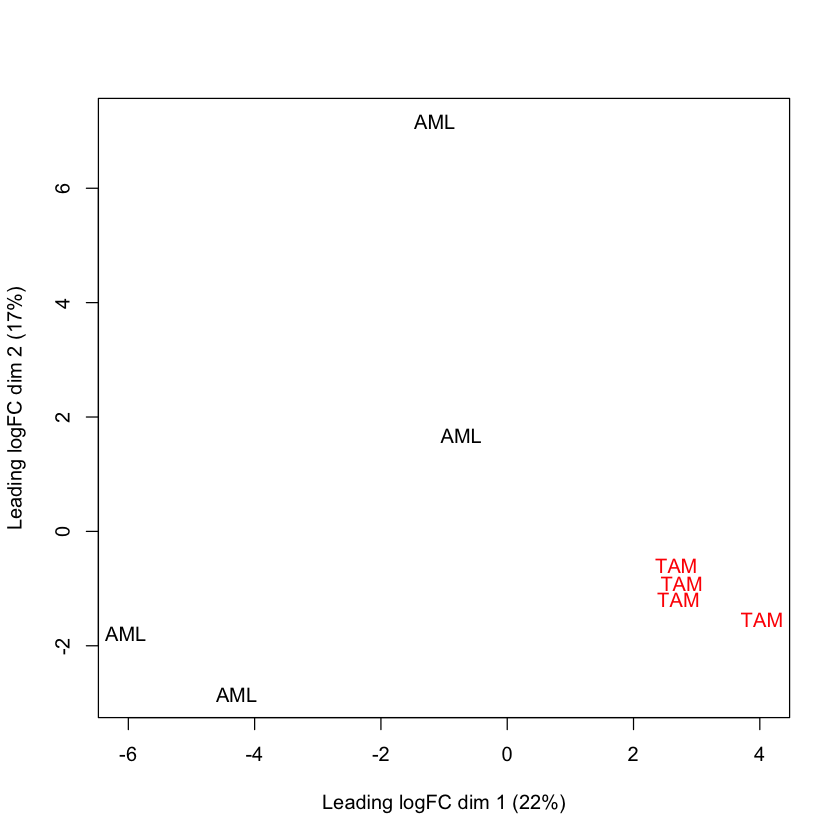

In [46]:
# MDS Plot - can we separate the samples well?
logCPM <- cpm(dge, log=TRUE, prior.count=3)
plotMDS(logCPM,labels=coldata$condition,top=10, col=c(rep(c("red","black"),3)))

In [47]:
head(logCPM)

,PAUVKY.03A,PAUVKY.40A,PAWSNZ.03A,PAWSNZ.40A,PAUTLA.03A,PAUTLA.40A,PAVUDU.03A,PAVUDU.40A
25,5.719920,5.560796,5.870456,6.5345895,5.865540,6.265028,5.518796,5.985203
27,5.387033,5.326112,5.354285,5.6682442,5.411114,5.811377,5.280704,5.562726
54,5.362934,4.400841,5.347216,6.2001249,4.895914,4.901825,4.541133,4.741000
152,6.843803,6.184160,5.514321,-0.4831915,6.670876,5.410724,6.444325,6.386464
153,7.255139,6.588580,5.993282,-0.4831915,7.003625,5.547021,6.821931,6.754795
155,7.770740,7.136931,6.480547,5.9070796,7.542540,6.392986,7.412562,7.335623


In [48]:
head(dge,2)

An object of class "DGEList"
$counts
   PAUVKY.03A PAUVKY.40A PAWSNZ.03A PAWSNZ.40A PAUTLA.03A PAUTLA.40A PAVUDU.03A
25        225        164        289        211        329        235        220
27        178        139        201        115        239        171        186
   PAVUDU.40A
25        296
27        220

$samples
           group lib.size norm.factors
PAUVKY.03A     1  4300614    1.0062805
PAUVKY.40A     1  3295478    1.0705103
PAWSNZ.03A     1  5482751    0.9121341
PAWSNZ.40A     1  2152496    1.0656054
PAUTLA.03A     1  6011649    0.9502982
PAUTLA.40A     1  3061854    1.0073496
PAVUDU.03A     1  4890491    0.9967273
PAVUDU.40A     1  4721495    1.0009642

In [49]:
fit <- lmFit(logCPM, design)
fit <- eBayes(fit, trend=TRUE)
de_results <- topTable(fit, coef=ncol(design), n=Inf) 
lookup <- rownames(de_results)
length(featureData[lookup,2])
head(featureData[lookup,2])

[1] 9062

[1] "CCNI"   "CCNI"   "CCNI"   "PABPC1" "PTMA"   "RPL10"

In [50]:
# There are too many values - lets reduce the size a bit more
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 5
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_results[
  abs(de_results$logFC) > fold_change_threshold &
  de_results$adj.P.Val < adjusted_pvalue_threshold,
]
dim(significant_genes)

[1] 6816    6

In [51]:
lookup <- rownames(significant_genes)
df <- as.data.frame(coldata[,c("condition","patient")])

significant_expression <- dge[lookup,]
dim(significant_expression)
length(lookup)

[1] 6816    8

[1] 6816

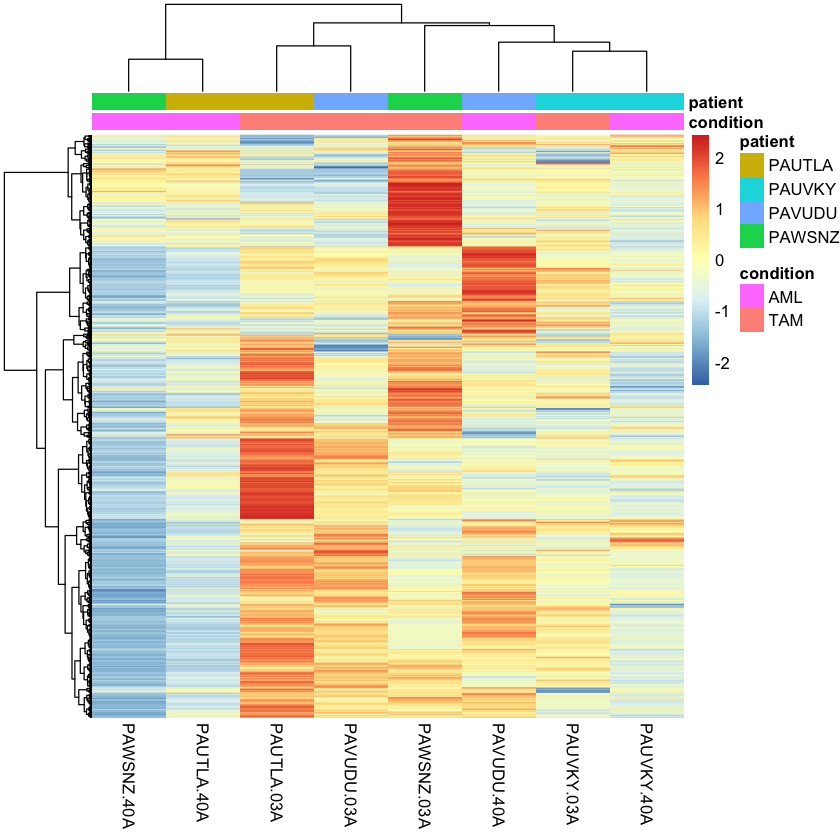

In [52]:
library("pheatmap")

significant_out <- pheatmap(significant_expression, 
                            cluster_rows5=TRUE, 
                            show_rownames=FALSE,
                            cluster_cols=TRUE, 
                            annotation_col=df, 
                            scale="row",
                            clustering_method = "ward.D2",
                            clustering_distance_cols = "minkowski", 
                            clustering_distance_rows = "minkowski" )

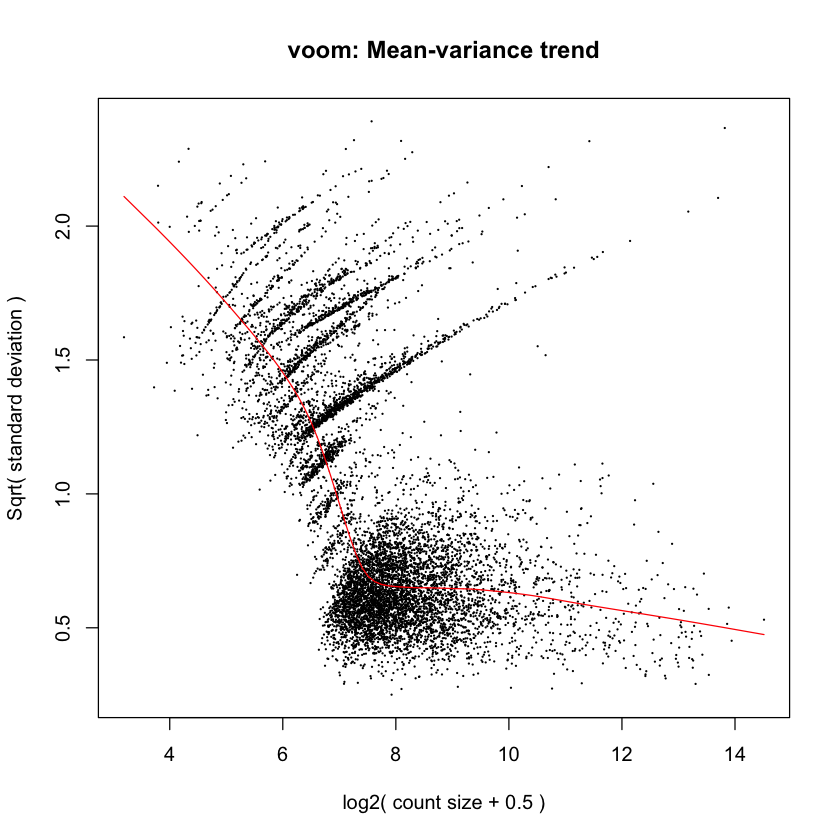

In [53]:
# weighting 
v <- voom(dge, plot=TRUE, normalize="quantile")

In [54]:
vfit <- lmFit(v, design)
vfit <- eBayes(vfit, trend=TRUE)
de_results <- topTable(vfit, coef=ncol(design), n=Inf) 
lookup <- rownames(de_results)
length(featureData[lookup,2])
head(featureData[lookup,2])

[1] 9062

[1] "RPL4"  "RPL5"  "RPL3"  "RPS3A" "RPL23" "RPS3A"

In [55]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 9
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_results[
  abs(de_results$logFC) > fold_change_threshold &
  de_results$adj.P.Val < adjusted_pvalue_threshold,
]
dim(significant_genes)

[1] 211   6

In [56]:
lookup <- rownames(significant_genes)
significant_expression <- dge[lookup,]

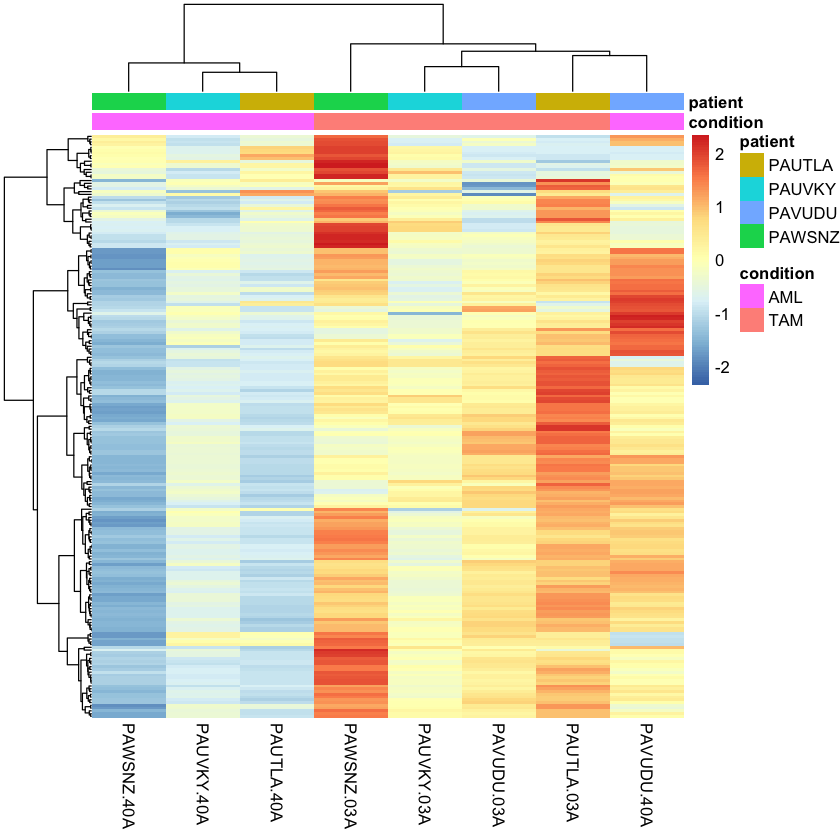

In [57]:
significant_out <- pheatmap(significant_expression, 
                            cluster_rows5=TRUE, 
                            show_rownames=FALSE,
                            cluster_cols=TRUE, 
                            annotation_col=df, 
                            scale="row",
                            clustering_method = "ward.D2",
                            clustering_distance_cols = "minkowski", 
                            clustering_distance_rows = "minkowski" )

In [58]:
featureData[head(rownames(significant_expression),5),2]

[1] "RPL4"  "RPL5"  "RPL3"  "RPS3A" "RPL23"

In [59]:
top_gene_list <- as.matrix(featureData[rownames(significant_expression),2])
length(top_gene_list)

[1] 211

In [60]:
top_significant_genes <- dge[rownames(significant_genes),]

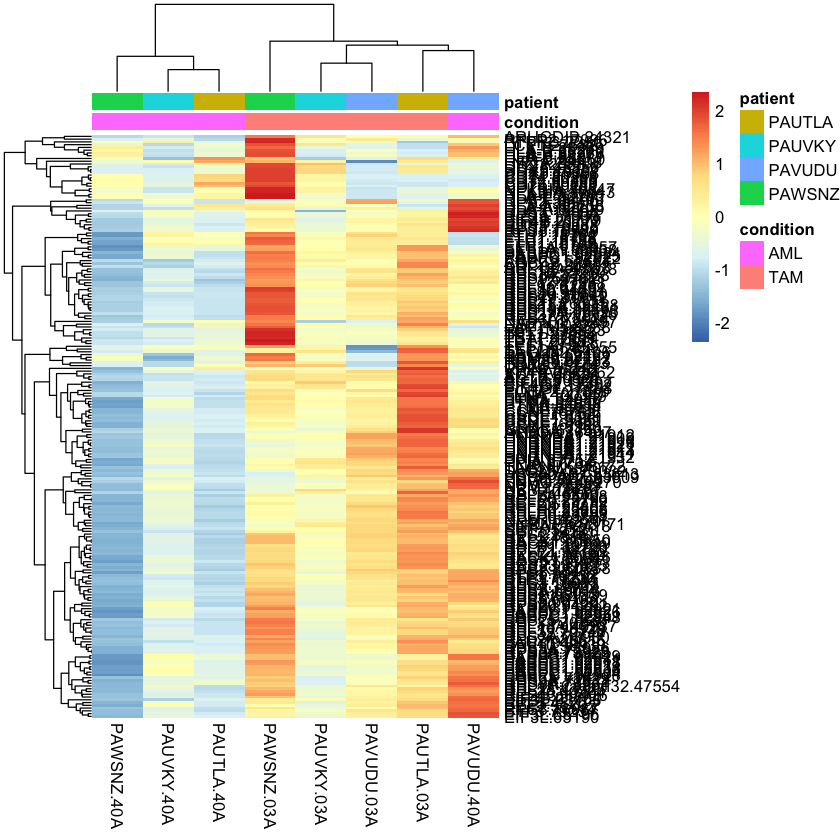

In [61]:
start=1
stop=length(top_gene_list)
date="2024Apr27_SE_voom"
piece <-top_significant_genes[significant_out$tree_row$order[start:stop],]
fd <- data.frame(featureData[rownames(piece),])
genejunction <- paste(featureData[rownames(piece),2],rownames(piece),sep=".")
rownames(fd) <- genejunction
rownames(piece) <- genejunction
outpiece<-pheatmap(piece, cluster_rows5=TRUE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )
piece_filename <- paste(paste(paste(paste(date,"SE_string_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")

# Order by TAM elements, followed by AML elements
piece_exp <- piece[,c(1,3,5,7,2,4,6,8)]
colnames(piece_exp) <- colnames(piece[,c(1,3,5,7,2,4,6,8)])
rownames(piece_exp) <- rownames(piece)
string_filename <- paste(paste(paste(paste(date,"SE_string_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
piece_exp_filename <- paste(paste(paste(paste(date,"SE_expression_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
write.csv(piece_exp$counts,piece_exp_filename,quote=FALSE)
write.csv(rownames(piece),piece_filename,quote=FALSE,row.names=FALSE)
write.csv(fd[,2],string_filename,quote=FALSE,row.names=FALSE)

In [62]:
#If you want something like gene-to-cluster assignment, you can 'cut' your row dendrogram into a pre-selected number of groups as follows:
# -- inspecating above the rows seem to fall into 7 groups
clusters<- as.matrix(row_clusters<- sort(cutree(significant_out$tree_row, k=7)),nrows=dim(top_genes_expression)[1],ncols=1)
genes_in_clusters = featureData[rownames(clusters),2]
genes_in_clusters.df <- data.frame(featureData[rownames(clusters),2], clusters)
colnames(genes_in_clusters.df) <- c("geneSymbol","cluster")
dim(genes_in_clusters.df)
cluster_1_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 1,]
cluster_2_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 2,]
cluster_3_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 3,]
cluster_4_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 4,]
cluster_5_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 5,]
cluster_6_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 6,]
cluster_7_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 7,]

cluster_1_filename <- paste(paste(date, "cluster_1", sep="_"),"csv",sep=".")
cluster_2_filename <- paste(paste(date, "cluster_2", sep="_"),"csv",sep=".")
cluster_3_filename <- paste(paste(date, "cluster_3", sep="_"),"csv",sep=".")
cluster_4_filename <- paste(paste(date, "cluster_4", sep="_"),"csv",sep=".")
cluster_5_filename <- paste(paste(date, "cluster_5", sep="_"),"csv",sep=".")
cluster_6_filename <- paste(paste(date, "cluster_6", sep="_"),"csv",sep=".")
cluster_7_filename <- paste(paste(date, "cluster_7", sep="_"),"csv",sep=".")

write.csv(cluster_1_genes$geneSymbol,cluster_1_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_2_genes$geneSymbol,cluster_2_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_3_genes$geneSymbol,cluster_3_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_4_genes$geneSymbol,cluster_4_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_5_genes$geneSymbol,cluster_5_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_6_genes$geneSymbol,cluster_6_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_7_genes$geneSymbol,cluster_7_filename,quote=FALSE,row.names=FALSE)


[1] 211   2

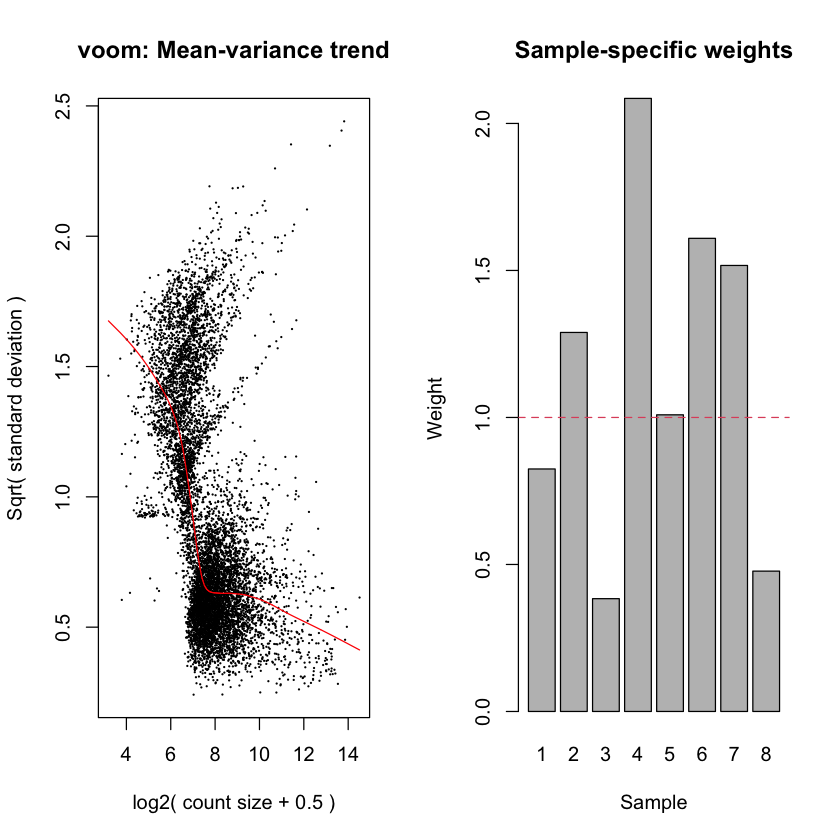

In [63]:
vwts <- voomWithQualityWeights(dge, design=design, normalize.method="quantile", plot=TRUE)

In [64]:
vwtsfit <- lmFit(vwts, design, weights = vwts$weights )
# no other weighting at this time.
 #* c(1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0))

In [65]:
vwtsfit <- eBayes(vwtsfit, trend=TRUE)
de_results <- topTable(vwtsfit, coef=ncol(design), n=Inf) 
lookup <- rownames(de_results)
length(featureData[lookup,2])
head(featureData[lookup,2])

[1] 9062

[1] "RPL4"   "RPL5"   "RPS3A"  "RPL3"   "PABPC1" "PABPC1"

In [66]:
# Assuming you have the 'de_results' object from topTable
fold_change_threshold <- 9
adjusted_pvalue_threshold <- 0.05

# Select genes that meet both fold change and adjusted p-value criteria
significant_genes <- de_results[
  abs(de_results$logFC) > fold_change_threshold &
  de_results$adj.P.Val < adjusted_pvalue_threshold,
]
dim(significant_genes)

[1] 211   6

In [67]:
lookup <- rownames(significant_genes)
significant_expression <- dge[lookup,]

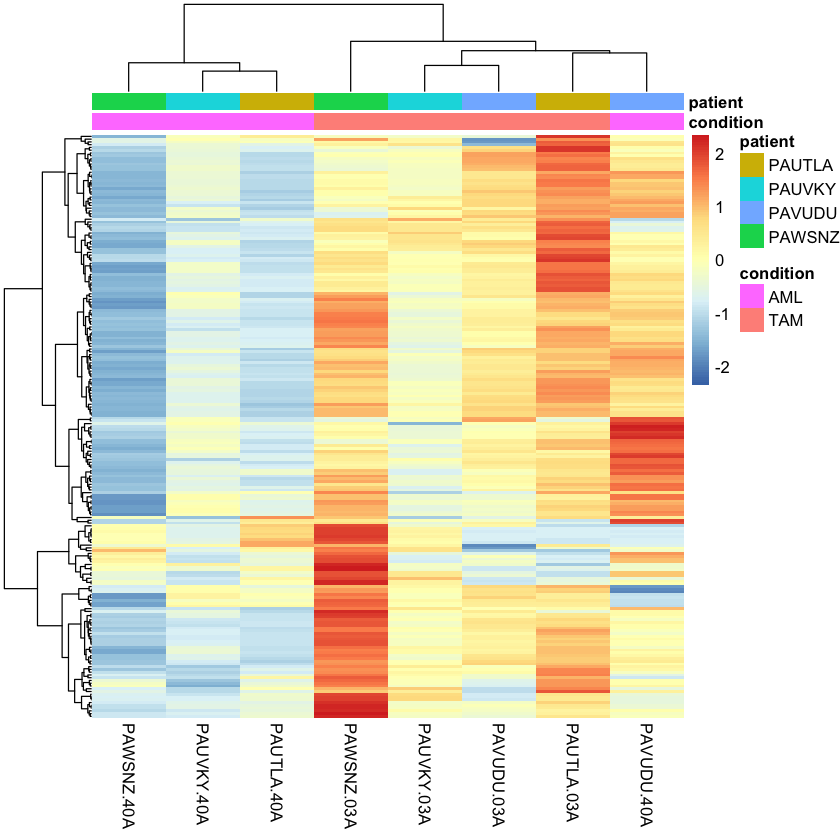

In [68]:
significant_out <- pheatmap(significant_expression, 
                            cluster_rows5=TRUE, 
                            show_rownames=FALSE,
                            cluster_cols=TRUE, 
                            annotation_col=df, 
                            scale="row",
                            clustering_method = "ward.D2",
                            clustering_distance_cols = "minkowski", 
                            clustering_distance_rows = "minkowski" )

In [69]:
featureData[head(rownames(significant_expression),5),2]

[1] "RPL4"   "RPL5"   "RPS3A"  "RPL3"   "PABPC1"

In [70]:
top_gene_list <- as.matrix(featureData[rownames(significant_expression),2])
length(top_gene_list)

[1] 211

In [71]:
top_significant_genes <- dge[rownames(significant_genes),]

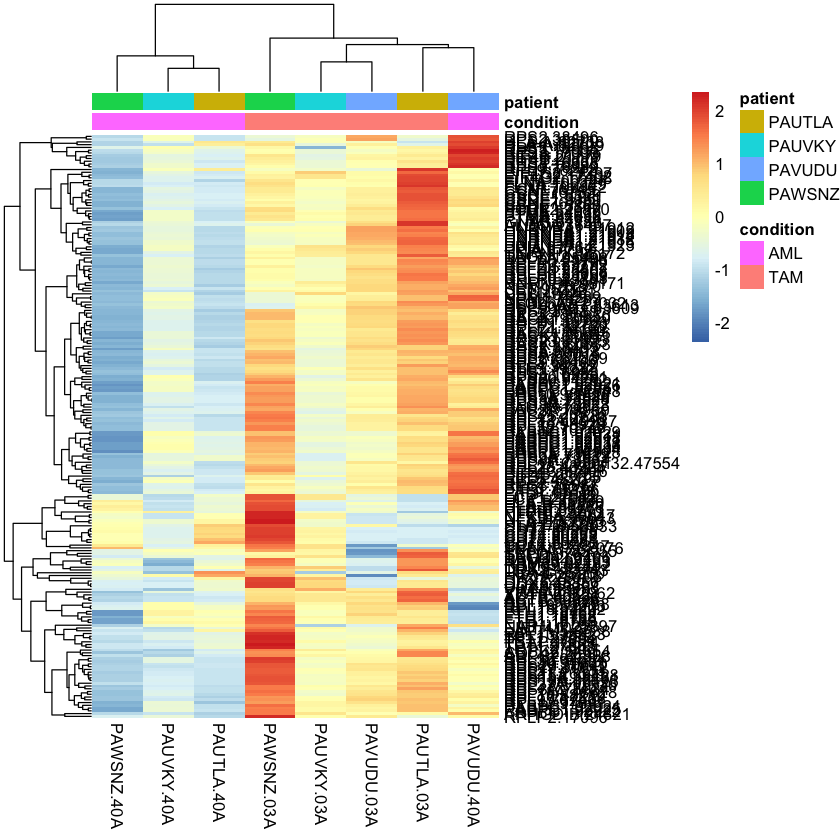

In [72]:
start=1
stop=length(top_gene_list)
date="2024Apr27_SE_vwts"
piece <-top_significant_genes[significant_out$tree_row$order[start:stop],]
fd <- data.frame(featureData[rownames(piece),])
genejunction <- paste(featureData[rownames(piece),2],rownames(piece),sep=".")
rownames(fd) <- genejunction
rownames(piece) <- genejunction
outpiece<-pheatmap(piece, cluster_rows5=TRUE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, scale="row",clustering_distance_cols = "minkowski", clustering_distance_rows = "minkowski" )
piece_filename <- paste(paste(paste(paste(date,"SE_string_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")

# Order by TAM elements, followed by AML elements
piece_exp <- piece[,c(1,3,5,7,2,4,6,8)]
colnames(piece_exp) <- colnames(piece[,c(1,3,5,7,2,4,6,8)])
rownames(piece_exp) <- rownames(piece)
string_filename <- paste(paste(paste(paste(date,"SE_string_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
piece_exp_filename <- paste(paste(paste(paste(date,"SE_expression_top_gene_list",sep="_"),start,sep="_"),stop,sep="_"),"csv",sep=".")
write.csv(piece_exp$counts,piece_exp_filename,quote=FALSE)
write.csv(rownames(piece),piece_filename,quote=FALSE,row.names=FALSE)
write.csv(fd[,2],string_filename,quote=FALSE,row.names=FALSE)

In [73]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}
save_pheatmap_pdf(outpiece, "2024Ap27_SE_vwts_10fold_top_significant_genes.pdf")

pdf 
  2

In [74]:
#If you want something like gene-to-cluster assignment, you can 'cut' your row dendrogram into a pre-selected number of groups as follows:
# -- inspecating above the rows seem to fall into 7 groups
clusters<- as.matrix(row_clusters<- sort(cutree(significant_out$tree_row, k=7)),nrows=dim(top_genes_expression)[1],ncols=1)
genes_in_clusters = featureData[rownames(clusters),2]
genes_in_clusters.df <- data.frame(featureData[rownames(clusters),2], clusters)
colnames(genes_in_clusters.df) <- c("geneSymbol","cluster")
dim(genes_in_clusters.df)
cluster_1_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 1,]
cluster_2_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 2,]
cluster_3_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 3,]
cluster_4_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 4,]
cluster_5_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 5,]
cluster_6_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 6,]
cluster_7_genes <- genes_in_clusters.df[genes_in_clusters.df$cluster == 7,]

cluster_1_filename <- paste(paste(date, "cluster_1", sep="_"),"csv",sep=".")
cluster_2_filename <- paste(paste(date, "cluster_2", sep="_"),"csv",sep=".")
cluster_3_filename <- paste(paste(date, "cluster_3", sep="_"),"csv",sep=".")
cluster_4_filename <- paste(paste(date, "cluster_4", sep="_"),"csv",sep=".")
cluster_5_filename <- paste(paste(date, "cluster_5", sep="_"),"csv",sep=".")
cluster_6_filename <- paste(paste(date, "cluster_6", sep="_"),"csv",sep=".")
cluster_7_filename <- paste(paste(date, "cluster_7", sep="_"),"csv",sep=".")

write.csv(cluster_1_genes$geneSymbol,cluster_1_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_2_genes$geneSymbol,cluster_2_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_3_genes$geneSymbol,cluster_3_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_4_genes$geneSymbol,cluster_4_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_5_genes$geneSymbol,cluster_5_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_6_genes$geneSymbol,cluster_6_filename,quote=FALSE,row.names=FALSE)
write.csv(cluster_7_genes$geneSymbol,cluster_7_filename,quote=FALSE,row.names=FALSE)


[1] 211   2

In [73]:
attributes (significant_expression)

$class
[1] "DGEList"
attr(,"package")
[1] "edgeR"

$names
[1] "counts"  "samples"

In [74]:
attributes(dset)

$.__classVersion__
            R       Biobase          eSet ExpressionSet 
     "2.15.0"      "2.16.0"       "1.3.0"       "1.0.0" 

$experimentData
Experiment data
  Experimenter name:  
  Laboratory:  
  Contact information:  
  Title:  
  URL:  
  PMIDs:  
  No abstract available.

$assayData
<environment: 0x7fdabc7d50c8>

$phenoData
An object of class 'AnnotatedDataFrame'
  sampleNames: GSM44075 GSM44078 ... GSM44302 (211 total)
  varLabels: sampleID description detailed_description
  varMetadata: labelDescription

$featureData
An object of class 'AnnotatedDataFrame': none

$annotation
character(0)

$protocolData
An object of class 'AnnotatedDataFrame': none

$class
[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"


In [76]:
myDset <- ExpressionSet(assayData=significant_expression$counts)

In [78]:
pData(myDset) <- df

In [79]:
attributes(myDset)

$.__classVersion__
            R       Biobase          eSet ExpressionSet 
      "4.3.2"      "2.62.0"       "1.3.0"       "1.0.0" 

$experimentData
Experiment data
  Experimenter name:  
  Laboratory:  
  Contact information:  
  Title:  
  URL:  
  PMIDs:  
  No abstract available.

$assayData
<environment: 0x7fdaadbaffc8>

$phenoData
An object of class 'AnnotatedDataFrame'
  sampleNames: PAUVKY.03A PAUVKY.40A ... PAVUDU.40A (8 total)
  varLabels: condition patient
  varMetadata: labelDescription

$featureData
An object of class 'AnnotatedDataFrame': none

$annotation
character(0)

$protocolData
An object of class 'AnnotatedDataFrame': none

$class
[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"


In [80]:
adjfile <- system.file("aracne", "bcellaracne.adj", package = "bcellViper")


In [112]:
adjfile

[1] "/Users/annedeslattesmays/miniconda3/envs/neos/lib/R/library/bcellViper/aracne/bcellaracne.adj"

In [109]:
regul <- aracne2regulon(adjfile_myDset, myDset, verbose = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'adjfile_myDset' not found


In [ ]:
adjfile_myDset

In [82]:
print(regul)

Object of class regulon with 20 regulators, 3758 targets and 6013 interactions


In [83]:
signature <- rowTtest(dset, "description", c("CB", "CC"), "N")


In [84]:
signature <- (qnorm(signature$p.value/2, lower.tail = FALSE) *sign(signature$statistic))[, 1]


In [88]:
mrs <- msviper(signature, regulon, nullmodel, verbose = FALSE)

In [89]:
summary(mrs)

,Regulon,Size,NES,p.value,FDR
,<chr>,<int>,<dbl>,<dbl>,<dbl>
TCF3,TCF3,298,3.30,0.000962,0.028
BCL6,BCL6,401,3.28,0.001030,0.028
KLF10,KLF10,254,3.25,0.001170,0.028
MYBL2,MYBL2,240,3.22,0.001300,0.028
TSC22D3,TSC22D3,333,-3.17,0.001520,0.028
HES1,HES1,360,-3.18,0.001470,0.028
ZNF32,ZNF32,291,-3.19,0.001420,0.028
ZMYND11,ZMYND11,452,-3.20,0.001380,0.028
ZNF101,ZNF101,301,-3.22,0.001300,0.028


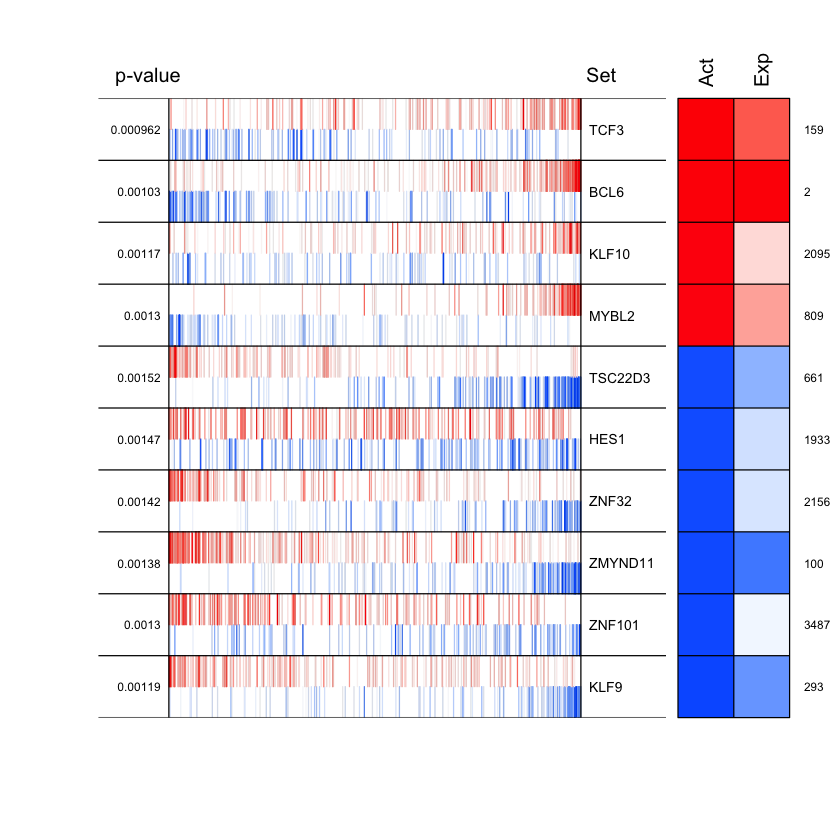

In [90]:
plot(mrs,cex=0.7)

In [91]:
mrs <- ledge(mrs)

In [92]:
summary(mrs)

,Regulon,Size,NES,p.value,FDR,Ledge
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
TCF3,TCF3,298,3.30,0.000962,0.028,"SMARCA4, MCM7, TRAF3IP3, NDC80, + 110 genes"
BCL6,BCL6,401,3.28,0.001030,0.028,"KIF14, BUB1, DLGAP4, GINS1, + 217 genes"
KLF10,KLF10,254,3.25,0.001170,0.028,"TRIP13, NDC80, AHNAK, KIF2C, + 99 genes"
MYBL2,MYBL2,240,3.22,0.001300,0.028,"SMARCA4, MCM7, TRIP13, GINS1, + 138 genes"
TSC22D3,TSC22D3,333,-3.17,0.001520,0.028,"NOTCH2, RAD1, RBM19, MLEC, + 190 genes"
HES1,HES1,360,-3.18,0.001470,0.028,"CDK4, SHC1, STX7, MAN1A1, + 104 genes"
ZNF32,ZNF32,291,-3.19,0.001420,0.028,"GNA12, PLAG1, PSMB1, CARM1, + 145 genes"
ZMYND11,ZMYND11,452,-3.20,0.001380,0.028,"ANKRD26, EXTL2, IGFBP4, CTSC, + 234 genes"
ZNF101,ZNF101,301,-3.22,0.001300,0.028,"SLC46A3, GCLM, TCEA2, HMOX2, + 128 genes"


In [93]:
signature <- bootstrapTtest(dset, "description", c("CB","CC"), "N", verbose=FALSE)

In [94]:
mrs <- msviper(signature, regulon, nullmodel, verbose = FALSE)

In [95]:
mrs <- bootstrapmsviper(mrs, "mode")

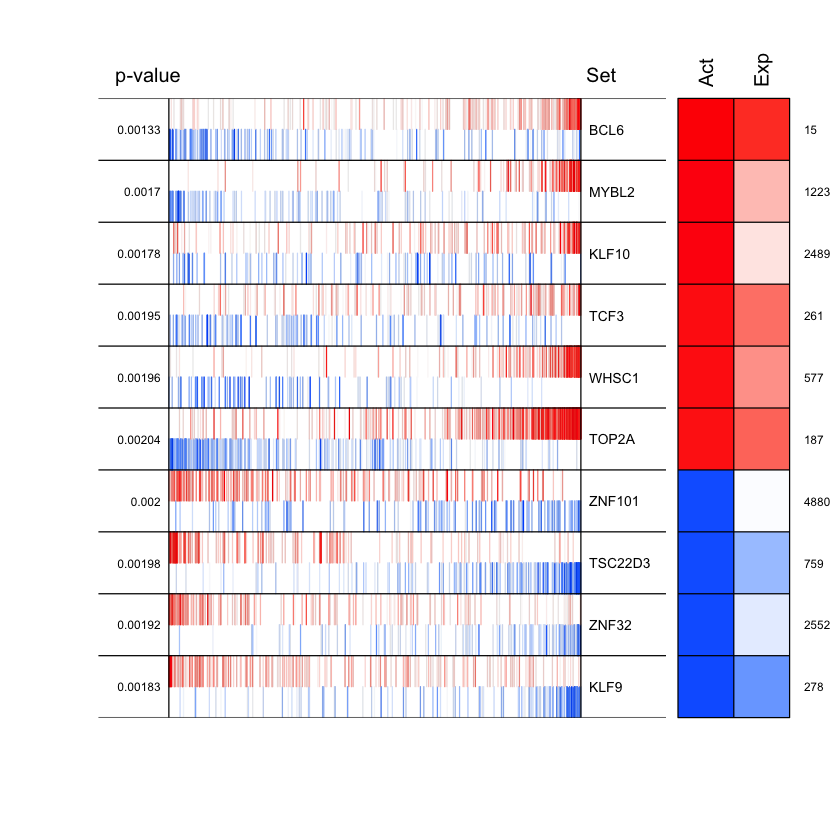

In [96]:
plot(mrs, cex=0.7)

In [97]:
mrshadow <- shadow(mrs, regulators=25, verbose=FALSE)

In [98]:
summary(mrshadow)

,Regulon,Size,NES,p.value,FDR
,<chr>,<int>,<dbl>,<dbl>,<dbl>
BCL6,BCL6,401,3.18,0.00146,0.0709
MYBL2,MYBL2,240,3.12,0.00184,0.0709
WHSC1,WHSC1,257,3.07,0.00213,0.0709
TOP2A,TOP2A,749,3.06,0.00222,0.0709
MYBL1,MYBL1,225,3.04,0.00239,0.0709
PTTG1,PTTG1,471,3.00,0.00273,0.0709
NR1D2,NR1D2,259,-3.00,0.00266,0.0709
TSC22D3,TSC22D3,313,-3.02,0.00255,0.0709
ZNF274,ZNF274,160,-3.04,0.00235,0.0709


In [99]:
mrs <- msviperCombinatorial(mrs, regulators=25, verbose=FALSE)

In [100]:
mrs <- msviperSynergy(mrs, verbose=FALSE)

In [101]:
summary(mrs)

,Regulon,Size,NES,p.value,FDR,Synergy
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ZNF32--PRKDC,ZNF32--PRKDC,30,4.74,2.17e-06,0.00138,1.48e-06
ZMYND11--PRKDC,ZMYND11--PRKDC,38,4.46,8.22e-06,0.00138,6.55e-05
MYBL2--CREB3L2,MYBL2--CREB3L2,37,4.45,8.44e-06,0.00138,5.30e-06
MYBL2--TSC22D3,MYBL2--TSC22D3,35,4.45,8.52e-06,0.00138,7.21e-06
BCL6--ZNF32,BCL6--ZNF32,35,4.44,9.13e-06,0.00138,1.79e-05
ZNF32--CREB3L2,ZNF32--CREB3L2,27,4.34,1.45e-05,0.00146,4.83e-07
PRKDC--NR1D2,PRKDC--NR1D2,42,4.30,1.71e-05,0.00146,7.19e-07
KLF9--HES1,KLF9--HES1,41,4.28,1.87e-05,0.00146,1.43e-03
BCL6--TOP2A,BCL6--TOP2A,104,4.27,1.99e-05,0.00146,1.12e-06


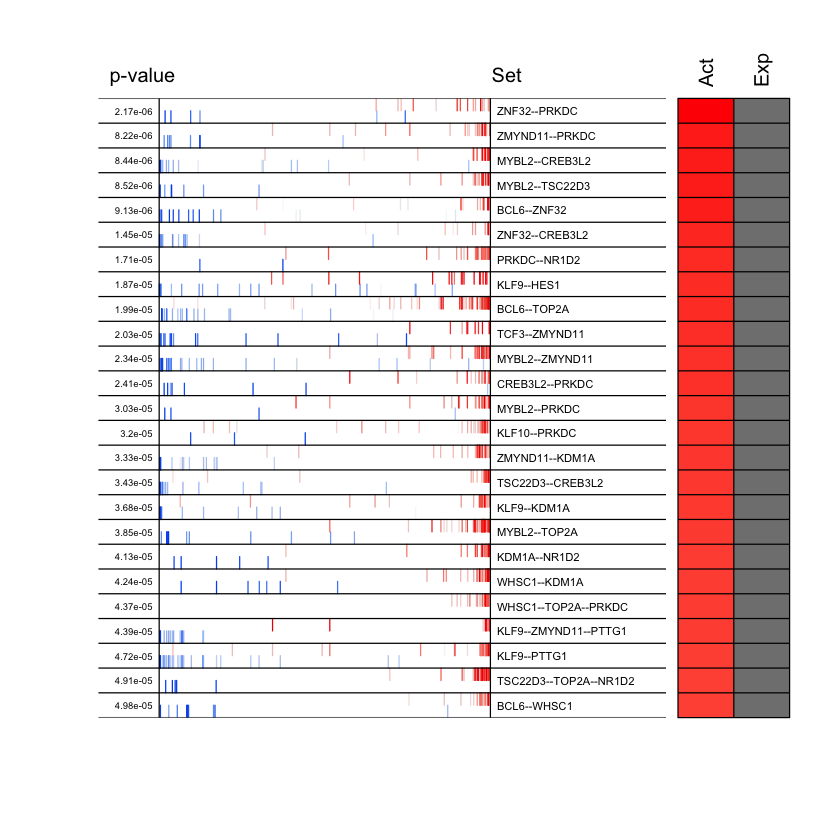

In [102]:
plot(mrs, 25, cex=0.7)

In [103]:
summary(dset)

       Length         Class          Mode 
            1 ExpressionSet            S4 

In [105]:
summary(adjfile)

   Length     Class      Mode 
        1 character character 

In [106]:
adjfile

[1] "/Users/annedeslattesmays/miniconda3/envs/neos/lib/R/library/bcellViper/aracne/bcellaracne.adj"

In [107]:
summary(regulon)

Regulators      Targets Interactions 
         621         6249       172240

In [108]:
head(regulon)

$AATF
$AATF$tfmode
      SAMM50         DRG1         ATIC      SMARCC1         AHCY     HSD17B10 
 0.996757513  0.996689745  0.991412543  0.983209919  0.965428819  0.990328485 
        CLK1        PPM1G       NDUFS7          FBL         PWP1        AIFM1 
-0.993995632  0.993595197  0.986542946  0.980294461  0.976409252  0.990042130 
       PRPF4        BCAT2         ICT1      SERINC1        ARMC6         ACLY 
 0.988789120  0.976208279  0.988550358 -0.985752019  0.991140202  0.990397733 
      ATP5G1          B2M        HLA-A       GTF2H3       PSMD11        HSPA4 
 0.984949994 -0.980298012 -0.975378764  0.991538073  0.974521236  0.970243086 
       RPL32       MRPL19       EXOSC7         DGKD        UBE2M         RPSA 
-0.900092405  0.972546514  0.969872348 -0.966370505  0.977933723 -0.941772747 
       AP1S1     EBNA1BP2          PHB       RUVBL2         CCT3       MTHFD1 
 0.938727816  0.962283478  0.986404526  0.972372677  0.977846793  0.980602866 
      IMPDH2        XRCC6     TMEM106C        NTHL1         POP1        NSDHL 
 0.977793043  0.976075822  0.956929107  0.967089422  0.950883846  0.988580369 
      ATXN10       TMSB4X LOC100290481       EEF1A1       POLR2F       EXOSC2 
 0.984871563 -0.852646254 -0.830203801 -0.937802612  0.987593446  0.976942292 
       RPS14        RPS20        CYB5B        TAGLN        PRIM1         CCT7 
-0.919616036 -0.909421210  0.906995164 -0.980724473  0.974900566  0.977369066 
        TXN2        RPL28         SARS        HPRT1         ORC3        RPL41 
 0.966317714 -0.869496456  0.750284298  0.912800752  0.846018961 -0.919574436 
       RPS17        SHMT2          CAD        RPL15        RPS12       ZNF259 
-0.911998655  0.958745375  0.980178619 -0.866793036 -0.917346863  0.970576770 
        GGCT         CCT8         PES1        PFDN6       RPL37A         MEA1 
 0.968037513  0.983188558  0.947093298  0.956857326 -0.928801952  0.988506251 
        PMVK        ACADM         EPRS       BAIAP2        SNRPA          VCP 
 0.958426191  0.820333253  0.972007183 -0.974399953  0.976410171  0.971542530 
      STAMBP     C12orf24        GP1BB        DCAF7        DDOST        RPS29 
 0.972026570  0.944929201 -0.958708352  0.910185750  0.969669833 -0.910586001 
        ACTB      HLA-DRA       GNB2L1         PHF1         FIBP        RPL26 
-0.949195880 -0.944328302 -0.935156511 -0.974346392  0.977650370 -0.917912754 
   GABARAPL1      MRPS18B         DKC1      C1orf63         RRS1          MPI 
-0.947045898  0.965966822  0.958578183 -0.964195787  0.967833535  0.945367796 
       NAA10        CCNT2        BAZ2B         SND1         TBL3        RBM14 
 0.948522786 -0.948516806 -0.957195751  0.949934759  0.981306927  0.954841715 
       RPLP1      NDUFAF1        MPV17        PGAP2       MTSS1L          UBC 
-0.916909976  0.871622183  0.881907734  0.964516587 -0.936359438 -0.893004267 
     CCDC85B        HDDC2        PRPS2        NOP14        RPL10         PARN 
 0.960469891  0.963929691  0.900689435  0.959624609 -0.919169965  0.687769823 
        HBP1      CSNK2A1         TPI1         JAM3         RPA1         SKP2 
-0.951307392  0.920952292  0.978584590 -0.910153296  0.907275597  0.898169483 
       POLD2        RBM10       RPL27A     PAFAH1B3        USP13        TFAP4 
 0.952969939  0.900396661 -0.940262312  0.922974212  0.927473688  0.909818315 
         GPI         AARS         RPS8        COPS6       ZBTB20         LSM2 
 0.965103065  0.949488759 -0.942873815  0.969695593 -0.874579554  0.965199516 
         AK2       NDUFS8         PTMA      WBSCR22         UPP1         RPL9 
 0.911734701  0.911316488 -0.930578130  0.797960050 -0.896163450 -0.791769962 
      FAM98A        PMPCA       NUFIP1         ALG3         TBL2         KRT1 
 0.890961470  0.962880686  0.927126963  0.943309107  0.840937356 -0.945480943 
        FASN         NUDC       MAN2C1        UCHL3        POLA2         ECH1 
 0.459470914  0.940782310 -0.965853137  0.923315603  0.974660918  0.969594204 
       TNPO1         NPM3      